 <p style = "font-size: 40px;font-weight: bold;text-align:center;color:#0000FF"> Random Forest Regression </p>


<p style="font-size:100%;text-align:left;font-weight:bold"> Created by  : Ravi kumar
<p style="font-size:100%;text-align:left;font-weight:bold;"> Last edited : 02/05/2022

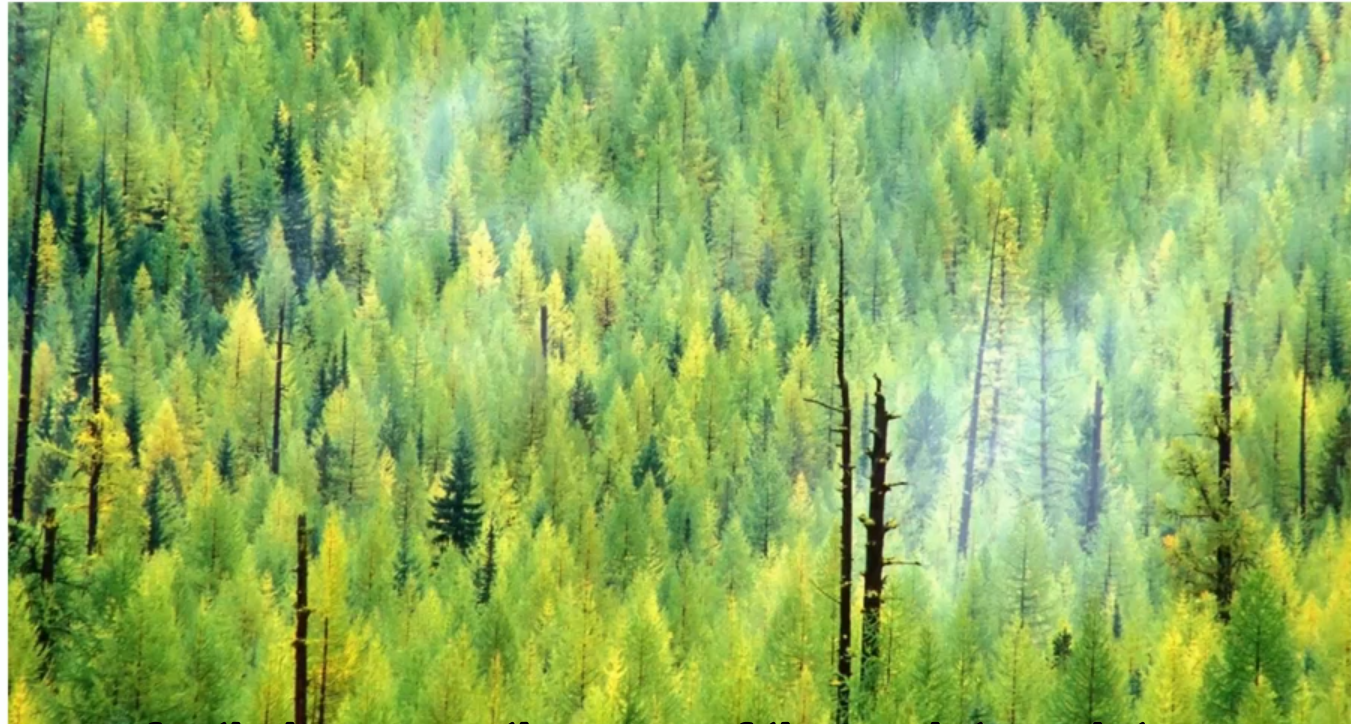

- It is a Ensemble learning (Combination of more than one algorithm or same algorith multiple time

**Steps-**
- Take k points from dataset
- Build a decision tree using those data points
- Choose the number of tree you want to make and keep repeating step1 and step2
- Then you take average accross all

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Reading the dataset

In [3]:
#CSV file
df = pd.read_csv("Position_Salaries.csv")
print("Unique positions: \n",df['Position'].unique(),'\n')
print("Number of Unique positions : ",df['Position'].nunique(),'\n')
print("Unique Levels: \n",df['Level'].unique(),'\n')
print("Number of Unique Levels : ",df['Level'].nunique())
display(df)
print(df.shape)

Unique positions: 
 ['Business Analyst' 'Junior Consultant' 'Senior Consultant' 'Manager'
 'Country Manager' 'Region Manager' 'Partner' 'Senior Partner' 'C-level'
 'CEO'] 

Number of Unique positions :  10 

Unique Levels: 
 [ 1  2  3  4  5  6  7  8  9 10] 

Number of Unique Levels :  10


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


(10, 3)


- Here we have one column as Position on Level
- We have to create a Polynomial Linear regressor that fits the data in a Parabolic line

## Checking for NULL values

In [4]:
#checking for NULL
print(df.isnull().sum()*100/df.shape[0])

Position    0.0
Level       0.0
Salary      0.0
dtype: float64


- Now we know that we don't have any NULL value in our dataset so that we can proceed further

## Splitting the X and y varible

In [5]:
#Getting X and y variable
X = df.iloc[:,1:2].values
y =df.iloc[:,2].values

In [6]:
print("Shape of X ",X.shape)
print("\n")
print("Shape of y", y.shape)

Shape of X  (10, 1)


Shape of y (10,)


Thou our data is so small we are not spliting the data into Test and Train data

In [20]:
#Creating a model object and fiting the data
reg = RandomForestRegressor(random_state=0)

reg_randomize = RandomForestRegressor(n_estimators= 300,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features='auto',
 max_depth=10,
 bootstrap= False,random_state=0)

reg_grid = RandomForestRegressor(n_estimators= 300,
 min_samples_split= 8,
 min_samples_leaf= 3,
 max_features=1,
 max_depth=80,
 bootstrap= True,random_state=0)

reg.fit(X,y)
reg_randomize.fit(X,y)
reg_grid.fit(X,y)

RandomForestRegressor(max_depth=80, max_features=1, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=300, random_state=0)

## Hyperparameter tuning

In [8]:
#Checking the default parameters
pprint(pprint(reg.get_params()))

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}
None


In [9]:
def hyperparameter_randomize(reg):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    #pprint(random_grid)
    rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X, y)
    #return rf_random.best_params_
    result = rf_random.best_params_
    df_new = pd.DataFrame([result])
    return df_new

In [18]:
def hyperparameter_grid(reg):
#     # Number of trees in random forest
#     n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
#     # Number of features to consider at every split
#     max_features = ['auto', 'sqrt']
#     # Maximum number of levels in tree
#     max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#     max_depth.append(None)
#     # Minimum number of samples required to split a node
#     min_samples_split = [2, 5, 10]
#     # Minimum number of samples required at each leaf node
#     min_samples_leaf = [1, 2, 4]
#     # Method of selecting samples for training each tree
#     bootstrap = [True, False]
#     # Create the random grid
#     param_grid  = {'n_estimators': n_estimators,
#                    'max_features': max_features,
#                    'max_depth': max_depth,
#                    'min_samples_split': min_samples_split,
#                    'min_samples_leaf': min_samples_leaf,
#                    'bootstrap': bootstrap}
    param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [0,1],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
    }
    #pprint(random_grid)
    grid_search  = GridSearchCV(estimator = reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
    # Fit the random search model
    grid_search.fit(X, y)
    result = grid_search.best_params_
    df_new = pd.DataFrame([result])
    return df_new

In [11]:
hyperparameter_randomize(reg)

In [19]:
hyperparameter_grid(reg)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\users\kumar\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [          nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan -206.10944514 -199.08418241 -197.28967184
 -206.10944514 -199.08418241 -197.28967184 -206.10944514 -199.08418241
 -197.28967184 -206.10944514 -199.08418241 -197.28967184 -206.10944514
 -199.08418241 -197.28967184 -206.10944514 -199.08418241 -197.28967184
 -206.10944514 -199.08418241 -197.28967184 -206.10944514 -199.08418241
 -197.28967184 -206.10944514 -199.08418241 -197.28967184           nan
           nan           nan           nan     

,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators
0,True,80,1,3,8,300


## Visualize model result

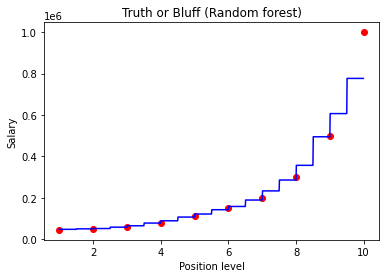

In [24]:
# Visualising the Random forest Regression results (higher resolution)
'''
We will get same graph like Decision tree but with more steps
'''
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random forest)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

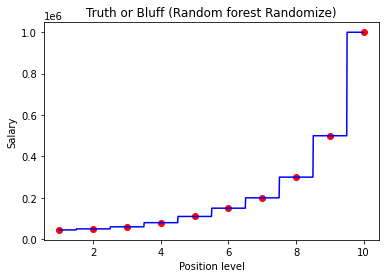

In [25]:
# Visualising the Random forest Regression results (higher resolution)
'''
We will get same graph like Decision tree but with more steps
'''
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg_randomize.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random forest Randomize)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

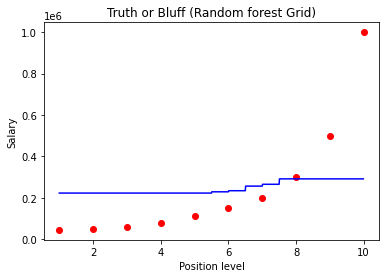

In [23]:
# Visualising the Random forest Regression results (higher resolution)
'''
We will get same graph like Decision tree but with more steps
'''
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg_grid.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random forest Grid)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting for a value

In [26]:
reg.predict([[6.5]])

array([158300.])

In [27]:
reg_randomize.predict([[6.5]])

array([150000.])

In [28]:
reg_grid.predict([[6.5]])

array([234384.76190476])